# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tralee
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | chibougamau
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | marsala
Processing Record 7 of Set 1 | usinsk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | callao
Processing Record 11 of Set 1 | huainan
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | aasiaat
Processing Record 16 of Set 1 | muar
Processing Record 17 of Set 1 | pekan
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | berdigestyakh
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | tazovsky
Processing Record 22 of Set 1 | taiohae
City not found. Skipping...


In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tralee,52.2704,-9.7026,44.56,88,100,8.34,IE,1706320530
1,bethel,41.3712,-73.4140,42.94,87,100,3.44,US,1706320234
2,puerto natales,-51.7236,-72.4875,46.60,70,100,13.27,CL,1706320530
3,chibougamau,49.9168,-74.3659,26.22,93,100,0.00,CA,1706320245
4,vila franca do campo,37.7167,-25.4333,64.89,99,100,15.57,PT,1706320531


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tralee,52.2704,-9.7026,44.56,88,100,8.34,IE,1706320530
1,bethel,41.3712,-73.4140,42.94,87,100,3.44,US,1706320234
2,puerto natales,-51.7236,-72.4875,46.60,70,100,13.27,CL,1706320530
3,chibougamau,49.9168,-74.3659,26.22,93,100,0.00,CA,1706320245
4,vila franca do campo,37.7167,-25.4333,64.89,99,100,15.57,PT,1706320531


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

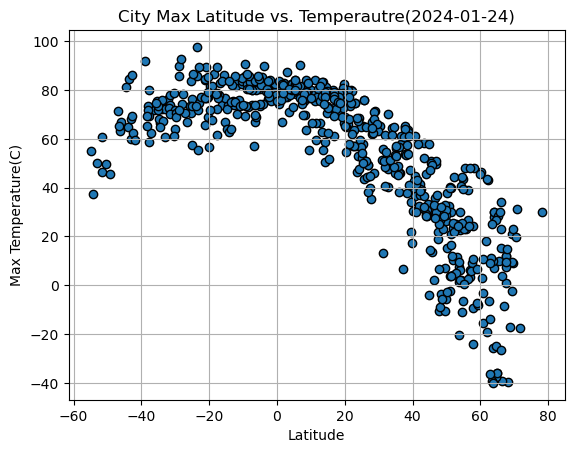

In [16]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
           city_data_df["Max Temp"],
            edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.title("City Max Latitude vs. Temperautre(2024-01-24)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

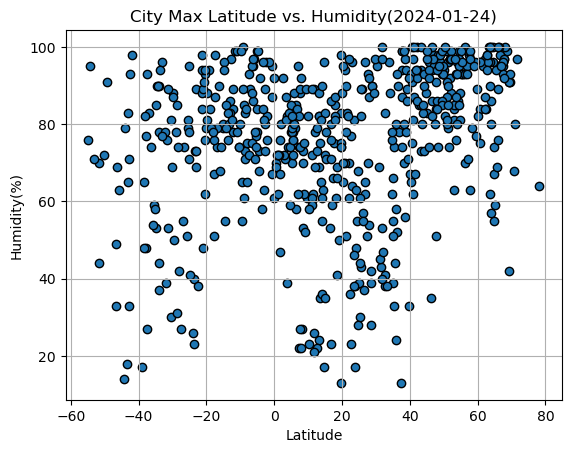

In [18]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
           city_data_df["Humidity"],
            edgecolor="black")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.title("City Max Latitude vs. Humidity(2024-01-24)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

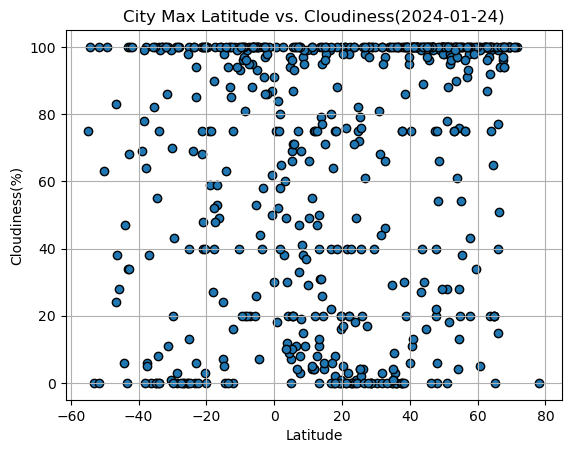

In [19]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
           city_data_df["Cloudiness"],
            edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.title("City Max Latitude vs. Cloudiness(2024-01-24)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

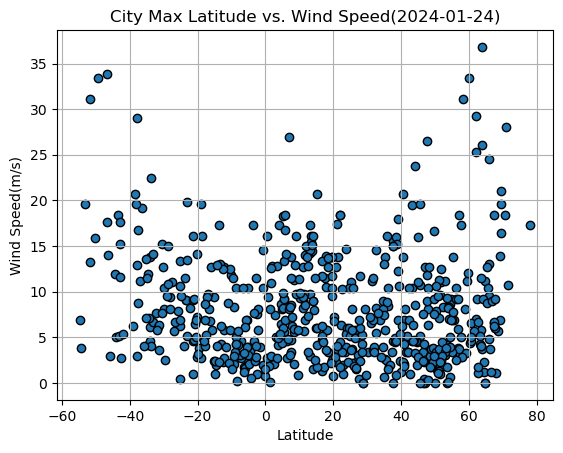

In [20]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
           city_data_df["Wind Speed"],
            edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.title("City Max Latitude vs. Wind Speed(2024-01-24)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regress_plot(x_values, y_values, xlabel, ylabel, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel('xlabel')
    plt.ylabel('ylabel')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tralee,52.2704,-9.7026,44.56,88,100,8.34,IE,1706320530
1,bethel,41.3712,-73.4140,42.94,87,100,3.44,US,1706320234
3,chibougamau,49.9168,-74.3659,26.22,93,100,0.00,CA,1706320245
4,vila franca do campo,37.7167,-25.4333,64.89,99,100,15.57,PT,1706320531
5,marsala,37.7966,12.4352,53.92,87,0,4.61,IT,1706320531


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,46.60,70,100,13.27,CL,1706320530
7,ushuaia,-54.8000,-68.3000,55.06,76,75,6.91,AR,1706320285
9,callao,-12.0667,-77.1500,81.72,78,0,12.66,PE,1706320300
12,waitangi,-43.9535,-176.5597,64.81,79,47,5.01,NZ,1706320532
13,port mathurin,-19.6833,63.4167,81.70,81,100,3.78,MU,1706320532


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7459373829121216


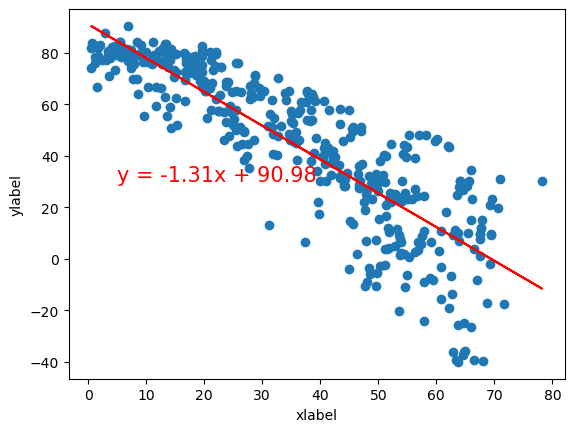

In [29]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regress_plot(x_values, y_values, "Latitude", "Max Temp", (5,30))

The r-squared is: 0.26406336271685554


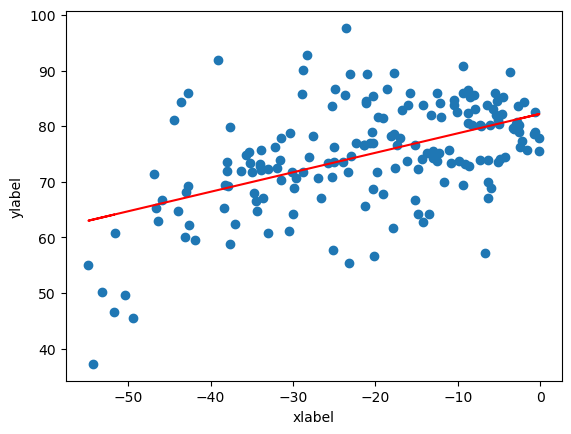

In [31]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regress_plot(x_values, y_values, "Latitude", "Max Temp", (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.18105518606445556


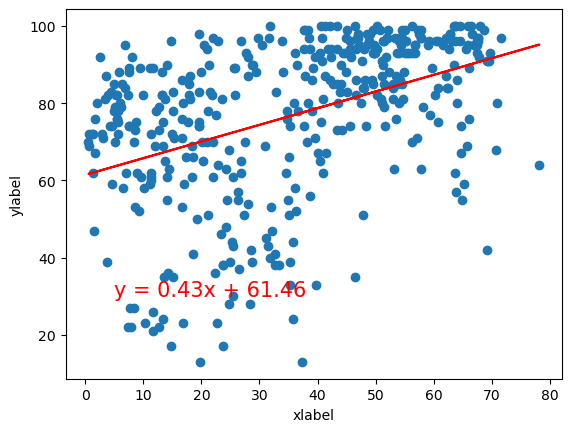

In [32]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regress_plot(x_values, y_values, "Latitude", "Humidity", (5,30))

The r-squared is: 0.1291249879222029


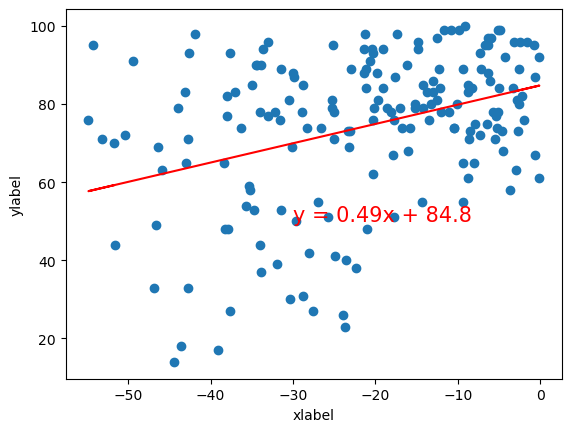

In [33]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regress_plot(x_values, y_values, "Latitude", "Humidity", (-30,30))

**Discussion about the linear relationship:** There is a positive relation between Latitude and humidity(for both Northern and Southerb hemisphere) but the data is not tightly clustered over the line, it shows that this is a moderate relationship. Also the r-squared value is more closer to 0, the model explains little variabilty on the dependent vairable(y - humidity).

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.11170169218470286


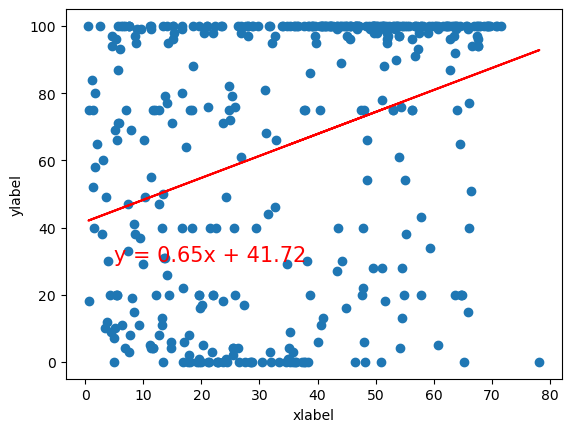

In [37]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regress_plot(x_values, y_values, "Latitude", "Cloudiness", (5,30))

The r-squared is: 0.060219470804228376


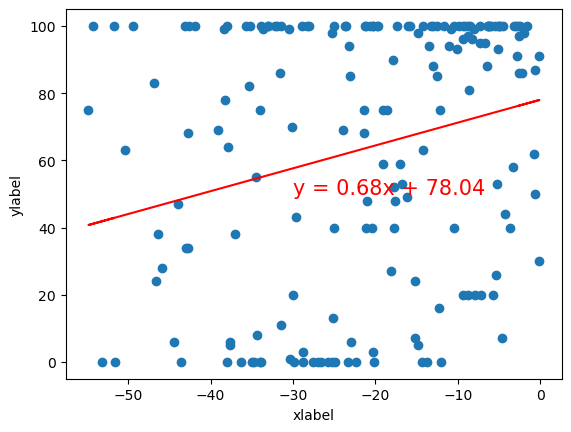

In [38]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regress_plot(x_values, y_values, "Latitude", "Cloudiness", (-30,30))

**Discussion about the linear relationship:** There is a positive relation between Latitude and cloudiness(for both Northern and Southerb hemisphere) but the data is very loosely clustered over the line, it shows that there is very little relationship. Also the r-squared value is very close to 0, the model explains little variabilty on the dependent vairable(y - humidity).

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0002455156578037705


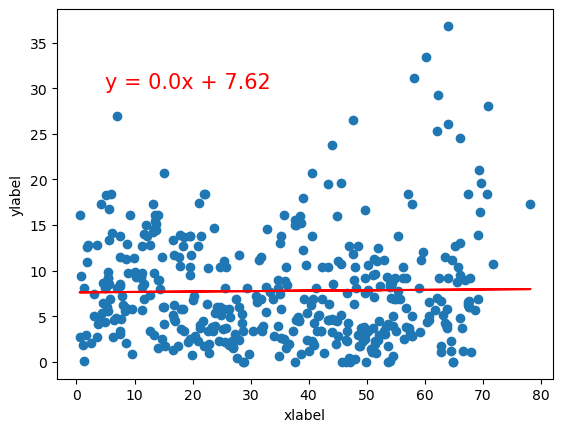

In [39]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regress_plot(x_values, y_values, "Latitude", "Wind Speed", (5,30))

The r-squared is: 0.22844422706330794


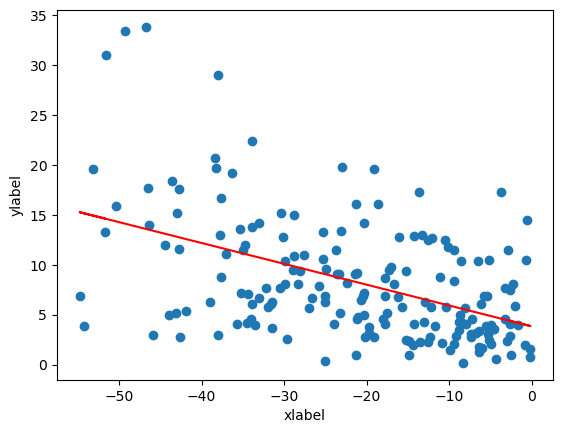

In [40]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regress_plot(x_values, y_values, "Latitude", "Wind Speed", (-30,30))

**Discussion about the linear relationship:** Since there is a straight line for Latitude and wind speed in Northern Hemisphere, it indicates no relation between the two variables(increasing x does not create impact on value of y). Also the data is loosely clustered which shows a moderate linear realtion. However for Southern hemishpere there is a negative realtion between Latitude and wind speed.